In [4]:
import math
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image

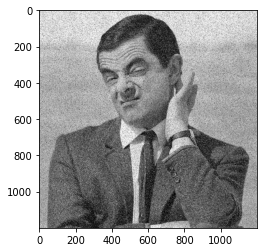

In [2]:
img = cv2.imread('mr.bean.jpg',0)
row ,col = img.shape
Nose = row//3 * col//3
for i in range(Nose):
    RowA = random.randint(1,row-1)
    RowB = random.randint(1,col-1)
    img[RowA:RowA+1,RowB:RowB+1] = 255

for i in range(Nose):
    RowA = random.randint(1,row-1)
    RowB = random.randint(1,col-1)
    img[RowA:RowA+1,RowB:RowB+1] = 0
plt.imshow(img,cmap='gray')

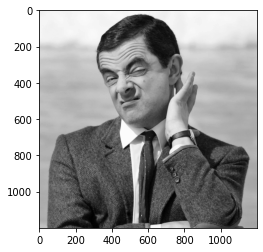

In [8]:
img = cv2.imread('mr.bean.jpg',0)
row ,col = img.shape
for i in range(1,row-2):
    for j in range(1,col-2):
        image = img[i-1:i+2,j-1:j+2]
        IMGEre = image.reshape(9)
        Stored = np.sort(IMGEre)
        img[i,j] = Stored[4]
        
plt.imshow(img,cmap='gray')

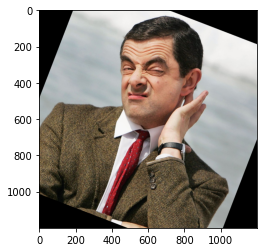

In [9]:
detector = MTCNN()
img = cv2.imread('mr.bean.jpg')
imgC = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(imgC)

def rotate(img,Left,Right):
    Lx , Ly = Left
    Rx , Ry = Right
    if Ly > Ry:
        Area = (Rx,Ly)
        rot = -1
    else:
        Area = (Lx,Ry)
        rot = 1
    
    a = np.sqrt(np.sum(np.multiply((np.array(Left)-np.array(Area)),(np.array(Left)-np.array(Area))
                                  )))
    b = np.sqrt(np.sum(np.multiply((np.array(Right)-np.array(Area)),(np.array(Right)-np.array(Area))
                                  )))
    c = np.sqrt(np.sum(np.multiply((np.array(Right)-np.array(Left)),(np.array(Right)-np.array(Left))
                                  )))

    if b != 0 and c != 0:
        cos = (math.pow(b,2) + math.pow(c,2) - math.pow(a,2))/(2*b*c)
        angle = np.arccos(cos)
        angle = (angle * 180) / math.pi

        if rot ==-1:
            angle= 90 - angle
        
        img = Image.fromarray(imgC)
        img = np.array(img.rotate(rot * angle)) 
    return img

detection = faces[0]
eyes = detection['keypoints']
left_eye = eyes['left_eye']
right_eye = eyes['right_eye']
img = rotate(img,left_eye,right_eye)

plt.imshow(img)